In [1]:
import pandas as pd
import re
from ua_parser import user_agent_parser
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def month_format(date):
    month = str(date)[4:6]
    return month

def day_format(date):
    day = str(date)[6:8]
    return day

def hour_format(date):
    hour = str(date)[8:10]
    return hour

def phone_or_web(user_agent_str):
    if 'Android' in user_agent_str or 'iPhone' in user_agent_str or 'iPad' in user_agent_str:
        return 'phone'
    else:
        return 'web'

In [2]:
data_columns = [
    "Bid ID", "Timestamp", "Log type", "iPinYou ID", "User-Agent", "IP",
    "Region", "City", "Ad exchange", "Domain", "URL", "Anonymous URL ID",
    "Ad slot ID", "Ad slot width", "Ad slot height", "Ad slot visibility",
    "Ad slot format", "Ad slot floor price", "Creative ID", "Bidding price",
    "Paying price", "Key page URL", "Advertiser ID", "User Tags"
]

columns_to_drop = [
    "Bid ID", "iPinYou ID", "User-Agent", "IP", "Domain", "URL", "Log type", "Timestamp",
    "Anonymous URL ID", "Creative ID", "Key page URL", "Ad slot ID", "User Tags", "Paying price"
]

In [3]:
data = pd.read_csv('data/all_data_iPinYou', sep="\t", header = 0)

In [ ]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12247477 entries, 0 to 12247558
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Bid ID               object 
 1   Timestamp            int64  
 2   Log type             int64  
 3   iPinYou ID           object 
 4   User-Agent           object 
 5   IP                   object 
 6   Region               int64  
 7   City                 int64  
 8   Ad exchange          int64  
 9   Domain               object 
 10  URL                  object 
 11  Anonymous URL ID     float64
 12  Ad slot ID           object 
 13  Ad slot width        int64  
 14  Ad slot height       int64  
 15  Ad slot visibility   int64  
 16  Ad slot format       int64  
 17  Ad slot floor price  int64  
 18  Creative ID          object 
 19  Bidding price        int64  
 20  Paying price         int64  
 21  Key page URL         object 
 22  Advertiser ID        int64  
 23  User Tags            object 
dtypes

In [24]:
impressions = data[data['Log type'] == 1]
clicks = data[data['Log type'] == 2]  
impressions_count = impressions.groupby('Advertiser ID').size()
clicks_count = clicks.groupby('Advertiser ID').size()

ctr_data = pd.DataFrame({
    'Impressions': impressions_count,
    'Clicks': clicks_count
}).fillna(0) 

ctr_data['CTR'] = (ctr_data['Clicks'] / ctr_data['Impressions']) * 100
print(ctr_data)

               Impressions  Clicks       CTR
Advertiser ID                               
1458               3083055    2610  0.084656
3358               1742104    1666  0.095631
3386               2847797    2431  0.085364
3427               2593765    2179  0.084009
3476               1970360    1092  0.055421


Bids - Общее количество ставок для каждого рекламодателя.

Imps - Количество выигранных аукционов (показов).

Clicks - Количество кликов по показам.

Convs - Количество конверсий .

Cost - затраты на показы.

CTR - Отношение кликов к показам.

CVR - Отношение конверсий к кликам.

CPM - Затраты на 1000 показов.

eCPC - Затраты на один клик.

In [6]:
imps = data[data['Log type'] == 1]  
clicks = data[data['Log type'] == 2] 
convs = data[data['Log type'] == 3] 

imps_count = imps.groupby('Advertiser ID').size()
clicks_count = clicks.groupby('Advertiser ID').size()
convs_count = convs.groupby('Advertiser ID').size()
cost_total = imps.groupby('Advertiser ID')['Paying price'].sum()
metrics = pd.DataFrame({
    'Imps': imps_count,
    'Clicks': clicks_count,
    'Convs': convs_count,
    'Cost': cost_total
}).fillna(0)  

metrics['CTR'] = (metrics['Clicks'] / metrics['Imps']) * 100
metrics['CVR'] = (metrics['Convs'] / metrics['Clicks']) * 100
metrics['CPM'] = (metrics['Cost'] / metrics['Imps'])
metrics['eCPC'] = (metrics['Cost'] / metrics['Clicks'])/1000

metrics.replace([float('inf'), -float('inf')], 0, inplace=True)

print(metrics)

                  Imps  Clicks  Convs       Cost       CTR        CVR  \
Advertiser ID                                                           
1458           3083056    2610    1.0  212400241  0.084656   0.038314   
3358           1742104    1666  466.0  160943087  0.095631  27.971188   
3386           2847802    2431    0.0  219066895  0.085364   0.000000   
3427           2593765    2179    0.0  210239915  0.084009   0.000000   
3476           1970360    1092   27.0  156088484  0.055421   2.472527   

                     CPM        eCPC  
Advertiser ID                         
1458           68.892761   81.379403  
3358           92.384316   96.604494  
3386           76.924904   90.113902  
3427           81.055884   96.484587  
3476           79.218257  142.938172  


1458 2 Chinese vertical e-commerce

2259 3 Milk powder

2261 3 Telecom

2821 3 Footwear

2997 3 Mobile e-commerce app install

3358 2 Software

3386 2 International e-commerce

3427 2 Oil

3476 2 Tire

In [8]:
!pip install user_agents

In [4]:
data_imp = pd.read_csv('data/final_data.csv', sep=",", header = 0)

In [5]:
def parse_timestamp(ts):
    ts_str = str(ts)
    year = int(ts_str[:4])
    month = int(ts_str[4:6])
    day = int(ts_str[6:8])
    hour = int(ts_str[8:10])
    minute = int(ts_str[10:12])
    return pd.Timestamp(year=year, month=month, day=day, hour=hour, minute=minute)

In [6]:
data_imp['Timestamp'] = data_imp['Timestamp'].apply(parse_timestamp)
data_imp['Hour'] = data_imp['Timestamp'].dt.hour
data_imp['Weekday'] =  data_imp['Timestamp'].dt.weekday

In [ ]:
data_imp['Weekday_name'] = data_imp['Timestamp'].dt.day_name()
correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


data_imp['Weekday_name'] = pd.Categorical(
    data_imp['Weekday_name'],
    categories=correct_order,
    ordered=True
)

In [9]:
cat_cols = [
    "Region",
    "City",
    "Ad exchange",
    "Ad slot width",
    "Ad slot height",
    "Ad slot visibility",
    "Ad slot format",
    "Ad slot floor price",
    "device",
    "os",
    "browser",
    "device_type"
]
time_cols = ["Hour", 'Weekday_name']


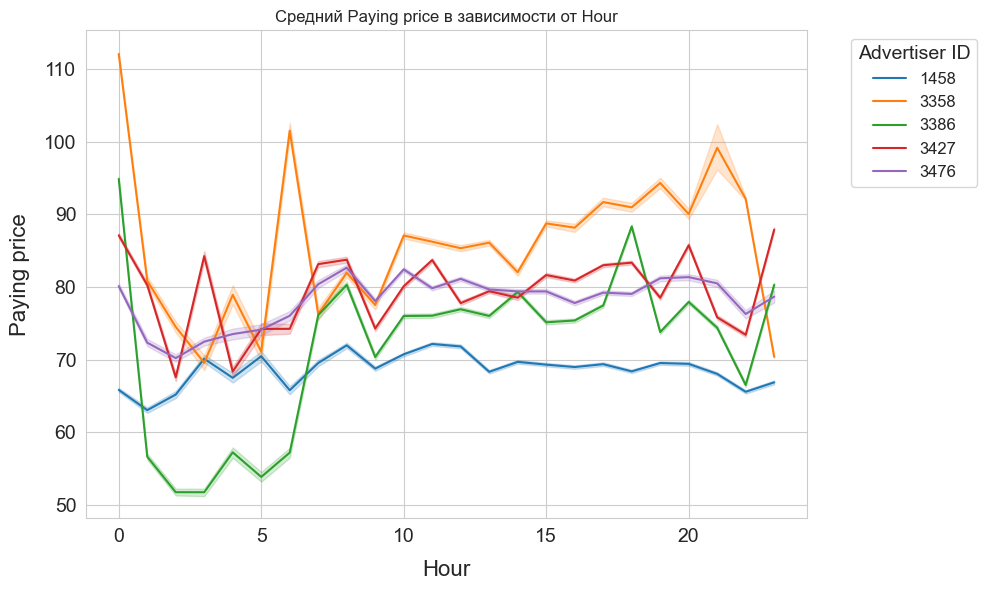

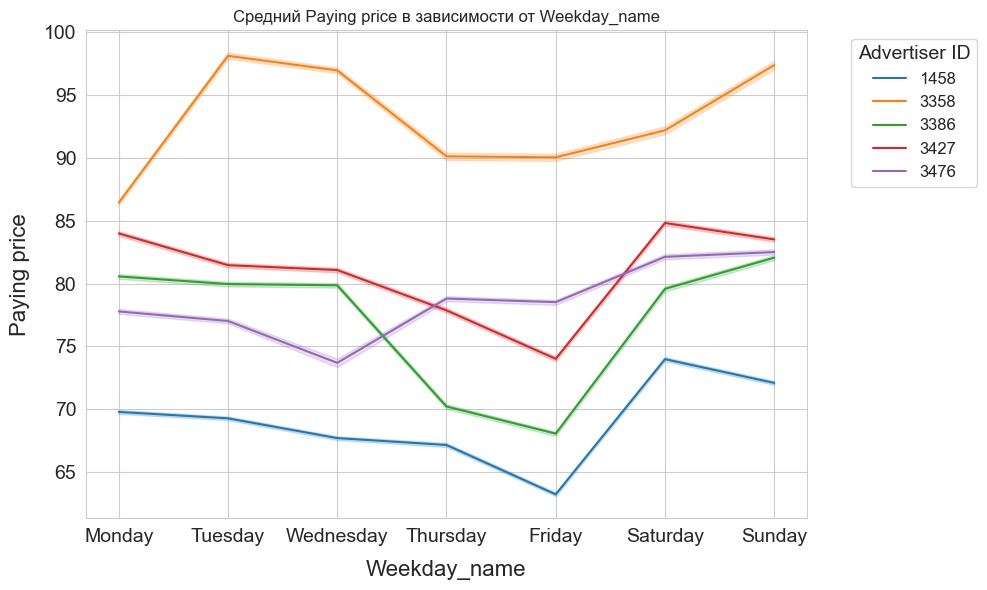

In [ ]:
for time_col in time_cols:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=data_imp,
        x=time_col,
        y="Paying price",
        hue="Advertiser ID",
        estimator='mean',
        palette='tab10',

    )
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)
    plt.xlabel(time_col.capitalize(), fontsize=16, labelpad=10)
    plt.ylabel("Paying price", fontsize=16, labelpad=10)
    plt.title(f"Средний Paying price в зависимости от {time_col}")
    plt.legend(
        title='Advertiser ID',
        title_fontsize=14,
        fontsize=12,
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    plt.tight_layout()
    plt.show()


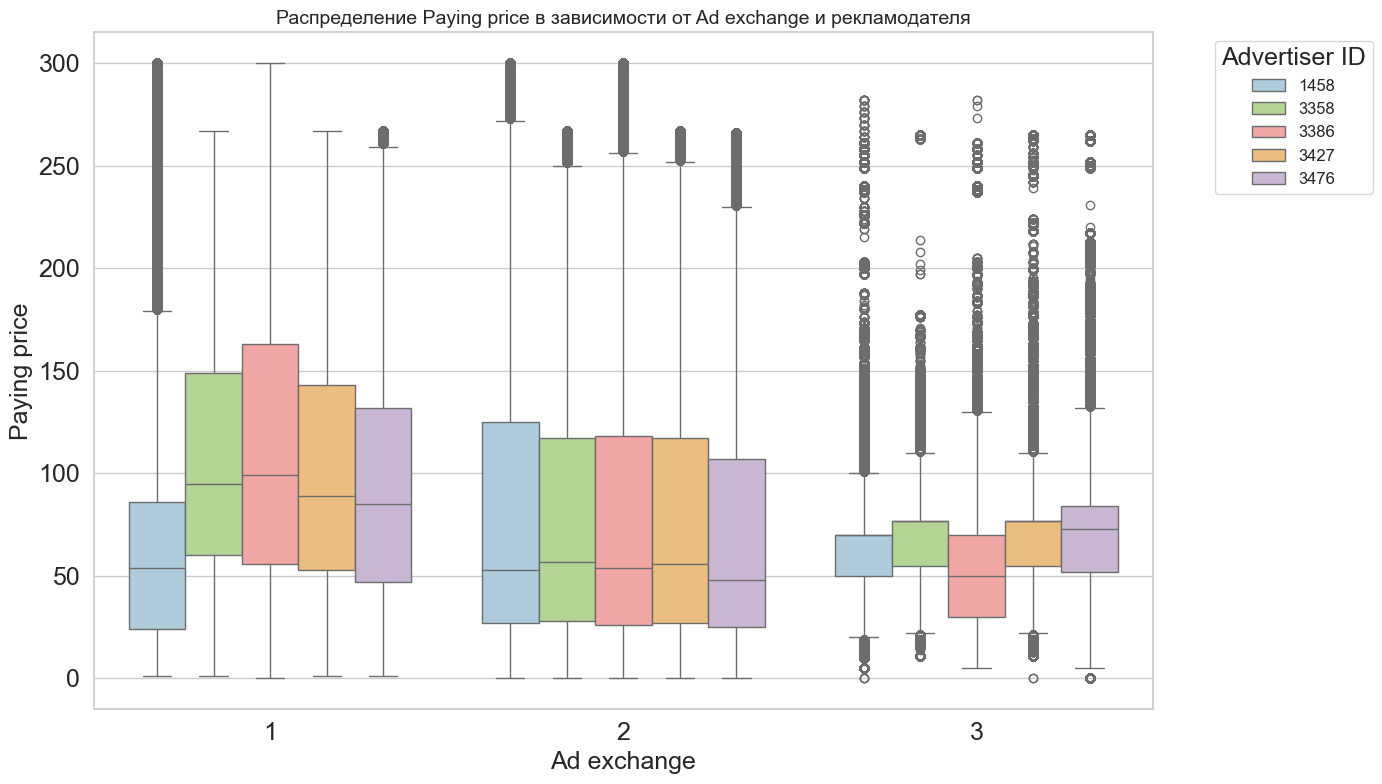

In [ ]:

plt.figure(figsize=(14, 8))

sns.boxplot(
    data=data_imp,
    x="Ad exchange",
    y="Paying price",
    hue="Advertiser ID",
    palette=["#A6CEE3", "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6"], 
    width=0.8,
    dodge=True
)


plt.title("Распределение Paying price в зависимости от Ad exchange и рекламодателя", fontsize=14)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.xlabel("Ad exchange", fontsize=18)
plt.ylabel("Paying price", fontsize=18)

plt.legend(
        title='Advertiser ID',
        title_fontsize=18,
        fontsize=12,
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )


plt.tight_layout()
plt.show()

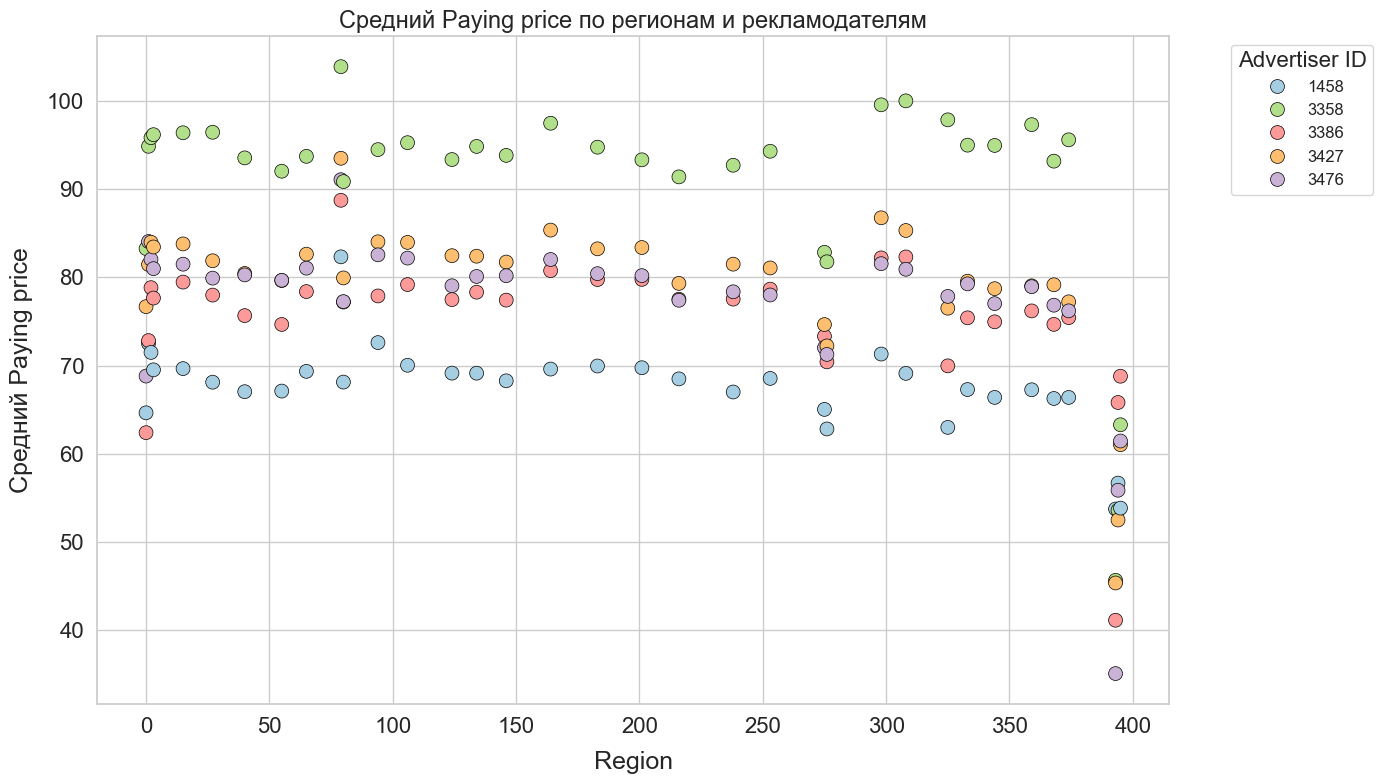

In [ ]:
sns.set(style="whitegrid")

pastel_palette = ["#A6CEE3", "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6"]

aggregated_data = data_imp.groupby(["Region", "Advertiser ID"], as_index=False)["Paying price"].mean()

plt.figure(figsize=(14, 8))


sns.scatterplot(
    data=aggregated_data,
    x="Region",
    y="Paying price",
    hue="Advertiser ID",
    palette=pastel_palette,
    s=100, 
    edgecolor="black", 
    linewidth=0.5,
)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Средний Paying price по регионам и рекламодателям", fontsize=17)
plt.xlabel("Region", fontsize=18, labelpad=10)
plt.ylabel("Средний Paying price", fontsize=18, labelpad=10)

plt.legend(
        title='Advertiser ID',
        title_fontsize=16,
        fontsize=12,
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )


plt.tight_layout()
plt.show()

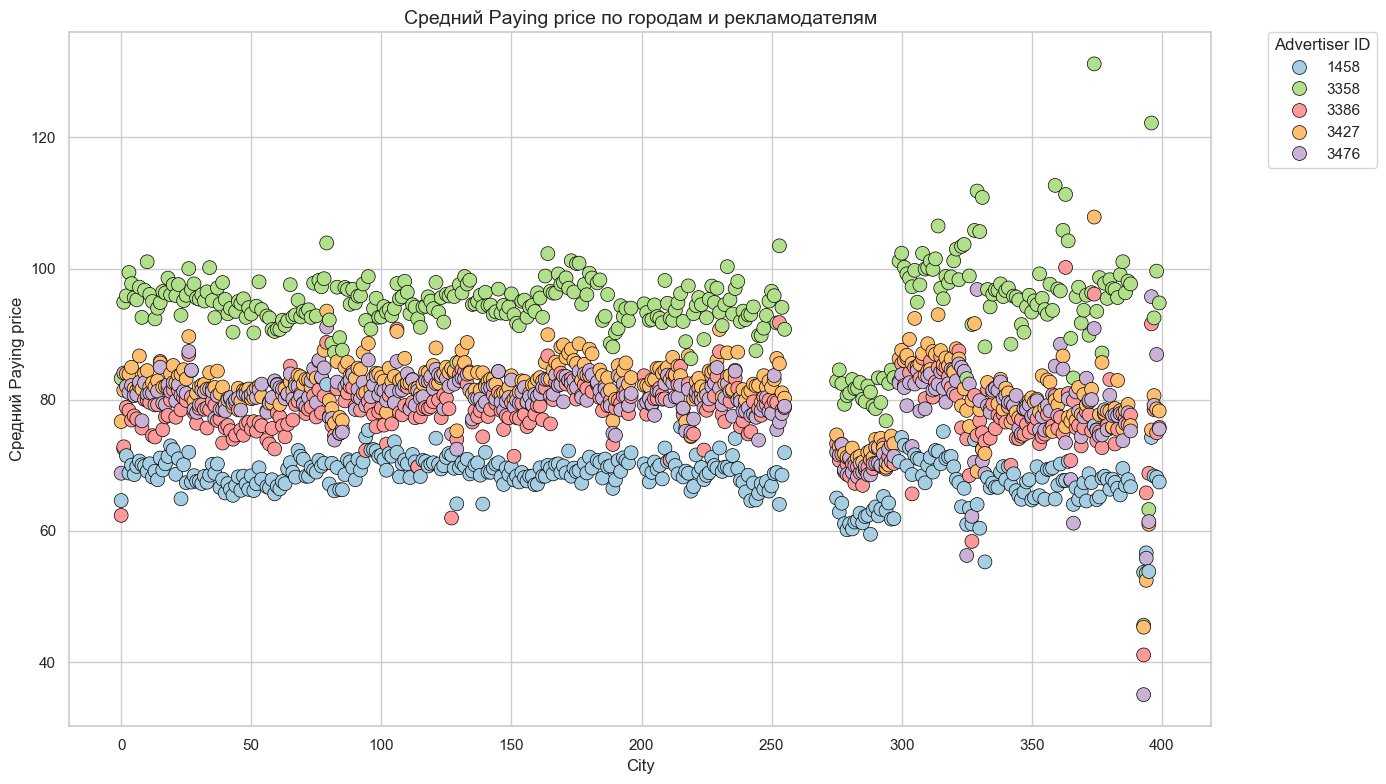

In [ ]:
sns.set(style="whitegrid")

pastel_palette = ["#A6CEE3", "#B2DF8A", "#FB9A99", "#FDBF6F", "#CAB2D6"]

aggregated_data = data_imp.groupby(["City", "Advertiser ID"], as_index=False)["Paying price"].mean()

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=aggregated_data,
    x="City",
    y="Paying price",
    hue="Advertiser ID",
    palette=pastel_palette,
    s=100, 
    edgecolor="black", 
    linewidth=0.5,
)


plt.title("Средний Paying price по городам и рекламодателям", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Средний Paying price", fontsize=12)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Advertiser ID")

plt.tight_layout()
plt.show()

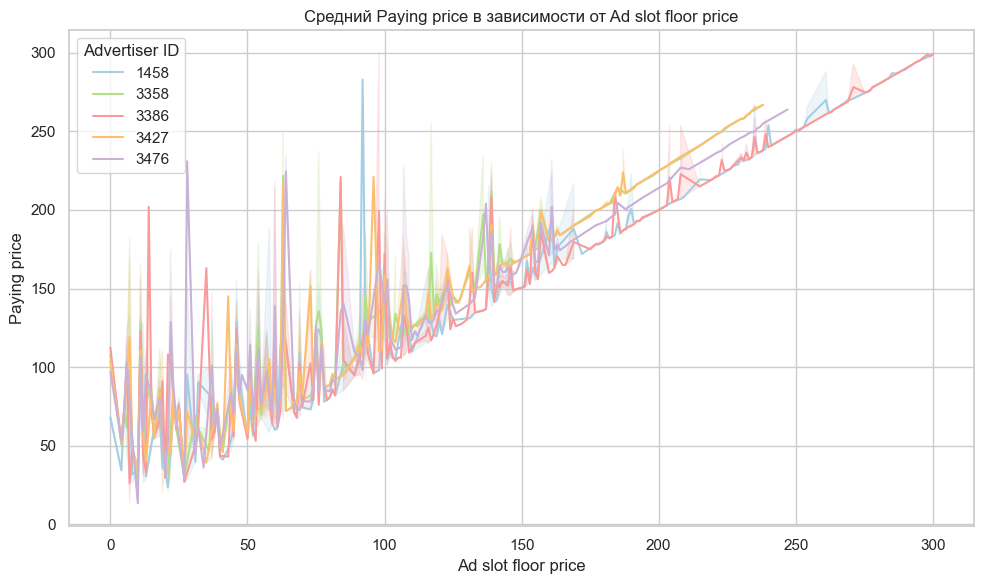

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data_imp,
    x="Ad slot floor price",
    y="Paying price",
    hue="Advertiser ID",
    estimator='mean',
    palette=pastel_palette,
)
plt.title(f"Средний Paying price в зависимости от Ad slot floor price")
plt.tight_layout()
plt.show()

In [34]:
for ad in [1458, 3358, 3386, 3427, 3476]:
    df = data[data["Advertiser ID"] == ad]
    print(df["Paying price"].describe())

count    3.085666e+06
mean     6.883447e+01
std      5.347229e+01
min      0.000000e+00
25%      3.200000e+01
50%      6.000000e+01
75%      8.000000e+01
max      3.000000e+02
Name: Paying price, dtype: float64
count    1.744161e+06
mean     9.227536e+01
std      6.396220e+01
min      0.000000e+00
25%      4.900000e+01
50%      7.700000e+01
75%      1.240000e+02
max      2.670000e+02
Name: Paying price, dtype: float64
count    2.850228e+06
mean     7.685940e+01
std      6.126246e+01
min      0.000000e+00
25%      3.200000e+01
50%      6.700000e+01
75%      9.000000e+01
max      3.000000e+02
Name: Paying price, dtype: float64
count    2.595944e+06
mean     8.098785e+01
std      5.758605e+01
min      0.000000e+00
25%      4.300000e+01
50%      7.600000e+01
75%      9.500000e+01
max      2.670000e+02
Name: Paying price, dtype: float64
count    1.971478e+06
mean     7.917333e+01
std      5.796532e+01
min      0.000000e+00
25%      4.000000e+01
50%      7.300000e+01
75%      9.400000e+01
ma

In [22]:
import numpy as np

df = data_imp.copy()
df['Paying price log'] = np.log1p(df['Paying price'])

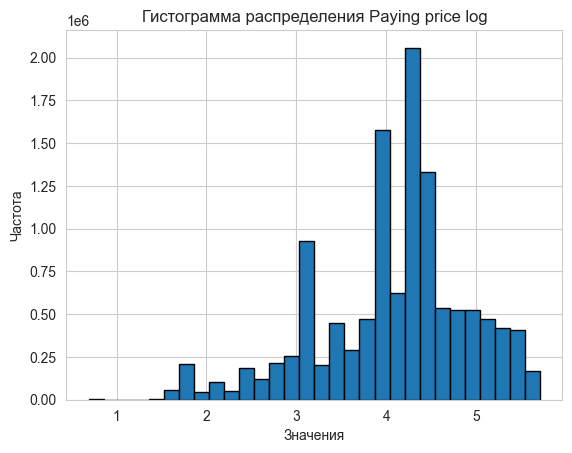

In [23]:
plt.hist(data_imp['Paying price log'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения Paying price log')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [24]:
df["Paying price"].describe()

count    1.223691e+07
mean     7.834809e+01
std      5.890993e+01
min      1.000000e+00
25%      3.800000e+01
50%      7.000000e+01
75%      9.200000e+01
max      3.000000e+02
Name: Paying price, dtype: float64